# MNIST Classification via logistic regression

In [1]:
# Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Load MNIST dataset

In [0]:
import os
import struct
import numpy as np
import matplotlib.pyplot as pyplot

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [0]:
tr = list(read("training", "/content/drive/My Drive/2019/2019-2/인공지능/PBL1/MNIST"))
te = list(read("testing", "/content/drive/My Drive/2019/2019-2/인공지능/PBL1/MNIST"))

In [0]:
X_train = np.asarray([data[1] for data in tr])
y_train = np.asarray([data[0] for data in tr])
X_test = np.asarray([data[1] for data in te])
y_test = np.asarray([data[0] for data in te])

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

### MNIST training set class distribution

In [5]:
labels = [x[0] for x in tr]
label_dist = [labels.count(x) for x in set(labels)]
print(dict(zip(range(0,10), label_dist)))

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


## 5 main steps training an ML algorithm:
1. Selection of features (feature selection)
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm.
4. Tuning the algorithm (validation-set)
5. Evaluating the performance of the model (test-set)

## Scikit-learn 4-Step Modeling Pattern (Digits Dataset)
### Step 1. Import the model you want to use

In [0]:
from sklearn.linear_model import LogisticRegression

### Step 2. Make an instance of the Model

In [0]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(C=1e5, solver = 'lbfgs', multi_class='multinomial')

### Step 3. Training the model on the data, storing the information learned from the data

In [8]:
from datetime import datetime

start_time = datetime.now()
logisticRegr.fit(X_train, y_train)
print('learning time :', datetime.now() - start_time)

learning time : 0:00:40.298714


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Step 4. Predict the labels of new data (new images)

In [0]:
from sklearn.metrics import f1_score

y_true = y_test
y_pred = logisticRegr.predict(X_test)

In [10]:
print(f1_score(y_true, y_pred, average='micro')) # 클래스 상관않고 전체로 카운팅
print(f1_score(y_true, y_pred, average='macro')) # 각 클래스 별로 구한 후, unweighted 평균을 구함.

0.9243
0.9232472859854843


## 로지스틱 회귀 과적합 피하기 (Penalty)

w값 정하기 = MLE로 구한 w(measure of fit)  – 패널티(과적합 막기용)  
참고 : https://hanvenpark.wordpress.com/2016/10/15/logistic-regression으로-보는-overfit/

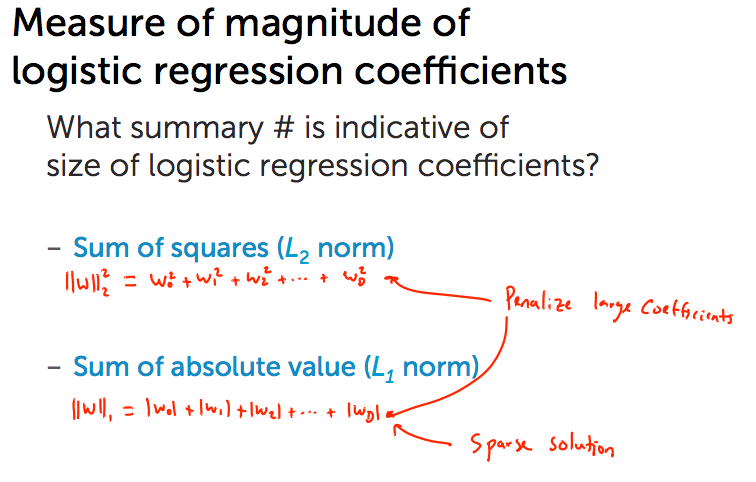

In [11]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/2019/2019-2/인공지능/PBL1/ipynb/image1.png', width=500)

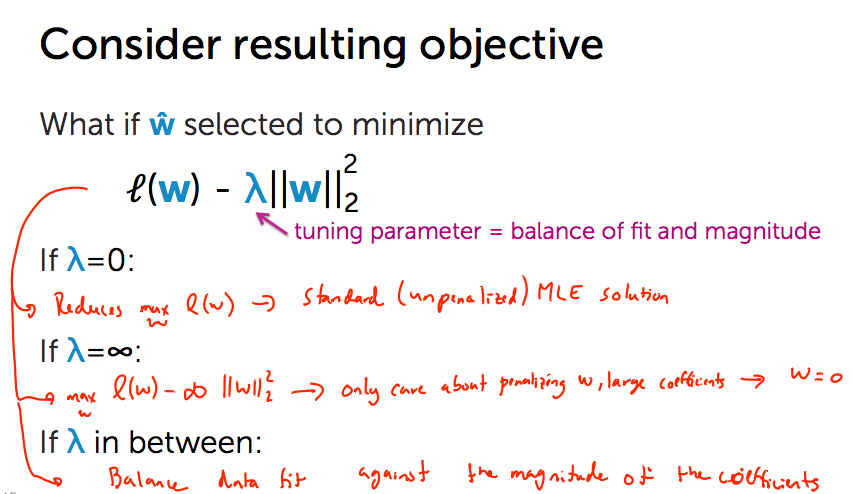

In [12]:
Image(filename='/content/drive/My Drive/2019/2019-2/인공지능/PBL1/ipynb/image2.png', width=500)

### Hyper parameter 조합
> penalty = L1 / L2  
> C = Inverse of regularization strength  
> solver = Algorithm to use in the optimization problem

#### solver = lbfgs

In [0]:
penalty = ['l2']
C_candidate = np.arange(-5., 5.)

In [0]:
for p in penalty:
    for c in C_candidate:
        C = 10.**c
        logisticRegr = LogisticRegression(penalty=p, C=C, solver = 'lbfgs', multi_class='multinomial', random_state=106)
        start_time = datetime.now()
        logisticRegr.fit(X_train, y_train)
        end_time = datetime.now()
        
        y_pred = logisticRegr.predict(X_test)
        score = f1_score(y_test, y_pred, average='macro')
        print(f'[{end_time-start_time}] penaly: {p} lambda: {C} > {score}')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:39.707315] penaly: l2 lambda: 1e-05 > 0.9239019518862778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:40.368472] penaly: l2 lambda: 0.0001 > 0.9237105928055482


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:40.895338] penaly: l2 lambda: 0.001 > 0.9229281142184174


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:41.086335] penaly: l2 lambda: 0.01 > 0.9231152297867137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:41.796623] penaly: l2 lambda: 0.1 > 0.9235386904567285


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:40.424273] penaly: l2 lambda: 1.0 > 0.9244351911243222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:40.741475] penaly: l2 lambda: 10.0 > 0.9232216836182767


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:40.611859] penaly: l2 lambda: 100.0 > 0.9231473992914451


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[0:00:40.596785] penaly: l2 lambda: 1000.0 > 0.9232472859854843
[0:00:40.853527] penaly: l2 lambda: 10000.0 > 0.9232472859854843


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### solver = liblinear
‘liblinear’ is limited to one-versus-rest schemes.

In [0]:
train_zero = [(1, pixel) if label == 0 else (0, pixel) for label, pixel in tr]
test_zero = [(1, pixel) if label == 0 else (0, pixel) for label, pixel in te]

X_train_zero = np.asarray([data[1] for data in train_zero])
y_train_zero = np.asarray([data[0] for data in train_zero])
X_test_zero = np.asarray([data[1] for data in test_zero])
y_test_zero = np.asarray([data[0] for data in test_zero])

X_train_zero = X_train_zero.reshape(X_train_zero.shape[0], -1)
X_test_zero = X_test_zero.reshape(X_test_zero.shape[0], -1)

In [0]:
penalty = ['l1', 'l2']
C_candidate = np.arange(-5., 5.)

In [15]:
for p in penalty:
    for c in C_candidate:
        C = 10.**c
        logisticRegr = LogisticRegression(penalty=p, C=C, solver = 'liblinear', multi_class='ovr', random_state=106)
        start_time = datetime.now()
        logisticRegr.fit(X_train_zero, y_train_zero)
        end_time = datetime.now()
        
        y_pred = logisticRegr.predict(X_test_zero)
        score = f1_score(y_test_zero, y_pred, average='macro')
        print(f'[{end_time-start_time}] penaly: {p} lambda: {C} > {score}')

[0:00:01.513811] penaly: l1 lambda: 1e-05 > 0.9422525513332357
[0:00:02.188679] penaly: l1 lambda: 0.0001 > 0.9732900508447782
[0:00:03.594111] penaly: l1 lambda: 0.001 > 0.9827715887456223
[0:00:08.670833] penaly: l1 lambda: 0.01 > 0.9811112829890385
[0:00:11.865027] penaly: l1 lambda: 0.1 > 0.9769554974684209
[0:00:12.645871] penaly: l1 lambda: 1.0 > 0.9752245974700935
[0:00:12.860423] penaly: l1 lambda: 10.0 > 0.9741218415707636
[0:00:12.931942] penaly: l1 lambda: 100.0 > 0.9746844102322688
[0:00:12.819677] penaly: l1 lambda: 1000.0 > 0.9746844102322688
[0:00:13.213270] penaly: l1 lambda: 10000.0 > 0.9741218415707636
[0:00:06.374060] penaly: l2 lambda: 1e-05 > 0.9830770655767094
[0:00:12.563714] penaly: l2 lambda: 0.0001 > 0.9800378274734657
[0:00:25.333063] penaly: l2 lambda: 0.001 > 0.9792037416178432
[0:01:54.908653] penaly: l2 lambda: 0.01 > 0.9780993762702361
[0:04:06.527426] penaly: l2 lambda: 0.1 > 0.9769346848782894


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0:07:13.286564] penaly: l2 lambda: 1.0 > 0.975874896865184
[0:07:33.471053] penaly: l2 lambda: 10.0 > 0.97475279904496


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0:07:35.810485] penaly: l2 lambda: 100.0 > 0.97475279904496
[0:06:51.282975] penaly: l2 lambda: 1000.0 > 0.9750445545830129
[0:08:14.792168] penaly: l2 lambda: 10000.0 > 0.97475279904496


In [0]:
def ova_f1_score(penalty, C, tr, te):
    scores = []
    for target in range(0, 10):
        train = [(1, pixel) if label == target else (0, pixel) for label, pixel in tr]
        test = [(1, pixel) if label == target else (0, pixel) for label, pixel in te]

        X_train = np.asarray([data[1] for data in train])
        y_train = np.asarray([data[0] for data in train])
        X_test = np.asarray([data[1] for data in test])
        y_test = np.asarray([data[0] for data in test])

        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

        C = 10.**c
        logisticRegr = LogisticRegression(penalty=p, C=C, solver = 'liblinear', multi_class='ovr', random_state=106)
        start_time = datetime.now()
        logisticRegr.fit(X_train_zero, y_train_zero)
        end_time = datetime.now()
        
        y_pred = logisticRegr.predict(X_test_zero)
        score = f1_score(y_test_zero, y_pred, average='macro')